# Regression models on Gardiner Expy flow dataset

In [ ]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
plot_label="Volume"

## Start by manipulating data

- Import data

In [3]:
df = pd.read_csv("./data/gardiner_count.csv.zip")
df.head(3)

,datetime_bin,volume_15min,number_of_lanes,direction,month,day,day_of_week,hour,minute,dist_from_mid_point
0,2022-08-11 15:00:00+00:00,160,3,W,August,11,Thursday,15,0,4.887837
1,2022-08-11 15:00:00+00:00,170,3,E,August,11,Thursday,15,0,0.474912
2,2022-08-11 15:00:00+00:00,169,3,E,August,11,Thursday,15,0,-0.635254


- Remove column "datetime_bin" because it is not needed at this moment

In [4]:
df.drop(["datetime_bin"],axis=1,inplace=True)
df.head(3)

,volume_15min,number_of_lanes,direction,month,day,day_of_week,hour,minute,dist_from_mid_point
0,160,3,W,August,11,Thursday,15,0,4.887837
1,170,3,E,August,11,Thursday,15,0,0.474912
2,169,3,E,August,11,Thursday,15,0,-0.635254


## Begin ML tasks
- Let us first study the influence of time period and location in the volume
- y: target (volume)
- X: features

No need to manually normalize the target because I will use StandardScaler

In [7]:
categorical_feats = ["direction","month","day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_feats)
transformed_df = transformed_df.astype("float32")
transformed_df.head(3)

,volume_15min,number_of_lanes,day,hour,minute,dist_from_mid_point,direction_E,direction_W,month_August,month_December,...,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,160.0,3.0,11.0,15.0,0.0,4.887837,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,170.0,3.0,11.0,15.0,0.0,0.474912,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,169.0,3.0,11.0,15.0,0.0,-0.635254,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
X = transformed_df.drop("volume_15min",axis=1)
y = transformed_df["volume_15min"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=42)

### LinearSVR
- Can't use Epsilon-Support Vector Regression because it doesn't scale well for large sets
- SKlearn docs say the "limit" is couple of 10Ks of data points and my set has 70K+
- Because of this limitation, I'm starting out with LinearSVR
- SKLearn docs suggest dual = False when N-samples > N-features

Steps:
1) Create the regressor itself
2) Use the regressor and the data with K-fold cross-validation (K=10)

Fitting model...
Fitting model... OK! Took 0.3628854751586914 seconds

model Linear Regression
r2 0.32668524980545044
mae 266.8264465332031
mse 104666.296875
rmse 323.5216979980469
mape 4640618000000000.0
time_to_fit 0.3628854751586914
time_to_predict 0.014278888702392578

Dumping model...
Dumping model... OK! Took 0.0021598339080810547 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


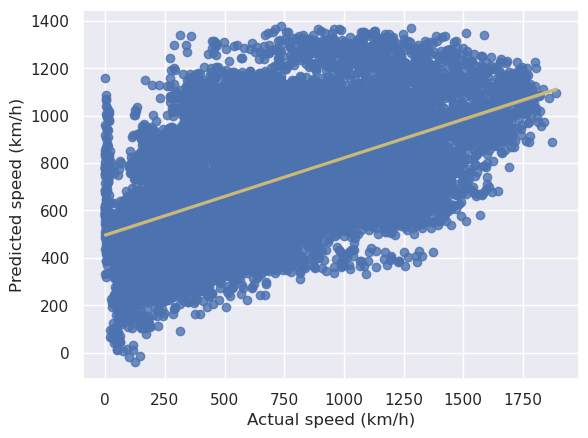

In [11]:
from sklearn.linear_model import LinearRegression

file_name = "011_linear_regression"
model_name = "Linear Regression"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, LinearRegression(), X_train, X_val, y_train, y_val, plot_label)

### Logistic Regression

Fitting model...
Fitting model... OK! Took 2.3439178466796875 seconds

model Logistic Regression
r2 -0.07443571090698242
mae 284.98614501953125
mse 167020.28125
rmse 408.68115234375
mape 1609625600000000.0
time_to_fit 2.3439178466796875
time_to_predict 0.02993178367614746

Dumping model...
Dumping model... OK! Took 0.00939631462097168 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


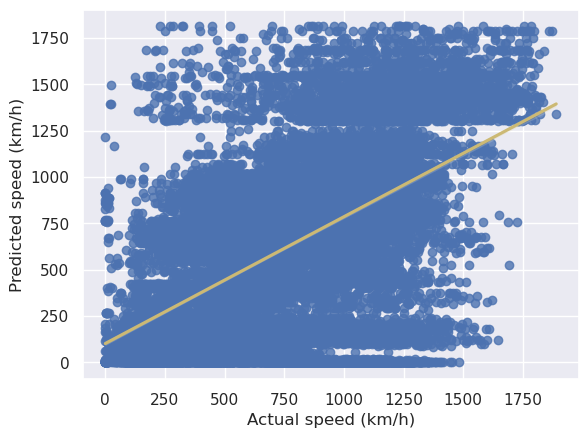

In [12]:
from sklearn.linear_model import LogisticRegression

file_name = "011_logistic_regression"
model_name = "Logistic Regression"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, LogisticRegression(), X_train, X_val, y_train, y_val, plot_label)

### Lasso

Fitting model...
Fitting model... OK! Took 0.038460493087768555 seconds

model Lasso
r2 0.3269765377044678
mae 266.8516540527344
mse 104621.0078125
rmse 323.45172119140625
mape 4648693300000000.0
time_to_fit 0.038460493087768555
time_to_predict 0.010524511337280273

Dumping model...
Dumping model... OK! Took 0.0021975040435791016 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


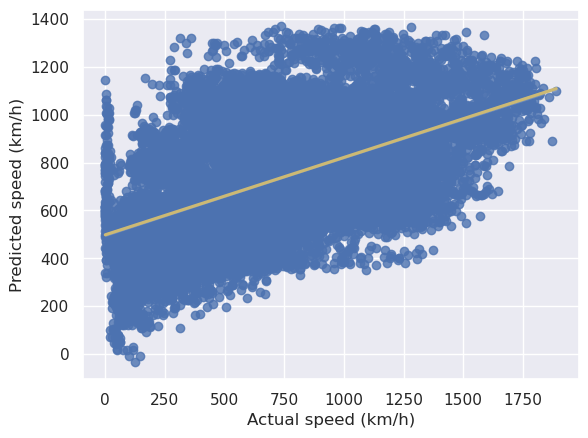

In [13]:
from sklearn.linear_model import Lasso

file_name = "011_lasso"
model_name = "Lasso"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, Lasso(), X_train, X_val, y_train, y_val, plot_label)

### Elastic Net

Fitting model...
Fitting model... OK! Took 0.03459954261779785 seconds

model Elastic Net
r2 0.28879088163375854
mae 278.5525207519531
mse 110556.9453125
rmse 332.50103759765625
mape 4783149000000000.0
time_to_fit 0.03459954261779785
time_to_predict 0.011351585388183594

Dumping model...
Dumping model... OK! Took 0.004313468933105469 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


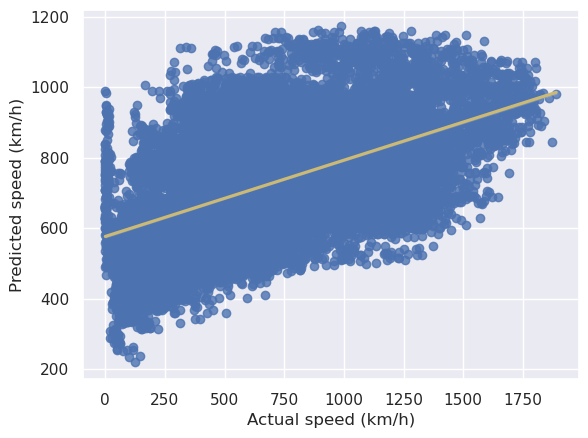

In [14]:
from sklearn.linear_model import ElasticNet

file_name = "011_elastic_net"
model_name = "Elastic Net"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, ElasticNet(), X_train, X_val, y_train, y_val, plot_label)

### Random Forest

Fitting model...
Fitting model... OK! Took 5.254787445068359 seconds

model Random Forest
r2 0.9439107179641724
mae 60.60856246948242
mse 8719.0439453125
rmse 93.37582397460938
mape 1948917600000000.0
time_to_fit 5.254787445068359
time_to_predict 0.2929704189300537

Dumping model...
Dumping model... OK! Took 10.642815351486206 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


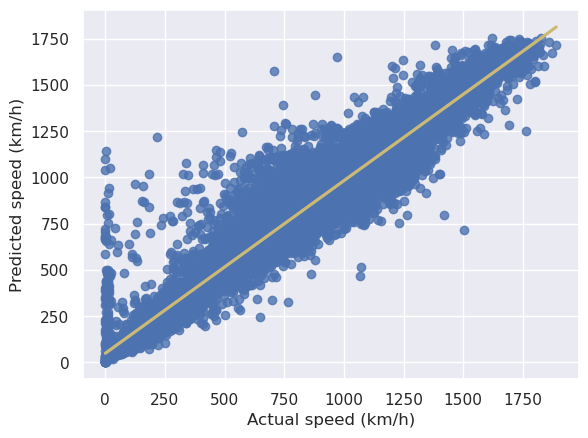

In [15]:
from sklearn.ensemble import RandomForestRegressor

file_name = "011_random_forest"
model_name = "Random Forest"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(), X_train, X_val, y_train, y_val, plot_label)

### Decision Tree

Fitting model...
Fitting model... OK! Took 0.3728017807006836 seconds

model Decision Tree
r2 0.9405099780544957
mae 56.923328738800826
mse 9247.683218470022
rmse 96.16487518044217
mape 998334128286505.9
time_to_fit 0.3728017807006836
time_to_predict 0.01455378532409668

Dumping model...
Dumping model... OK! Took 2.021153688430786 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


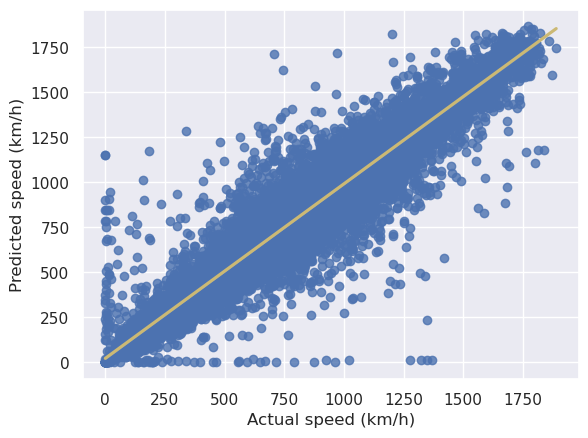

In [16]:
from sklearn.tree import DecisionTreeRegressor

file_name = "011_decision_tree"
model_name = "Decision Tree"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(), X_train, X_val, y_train, y_val, plot_label)

### XGBoost

Fitting model...
Fitting model... OK! Took 0.42647385597229004 seconds

model XGBoost
r2 0.9462652065621004
mae 62.886528
mse 8353.037
rmse 91.39495
mape 2390617200000000.0
time_to_fit 0.42647385597229004
time_to_predict 0.028575897216796875

Dumping model...
Dumping model... OK! Took 0.04801654815673828 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


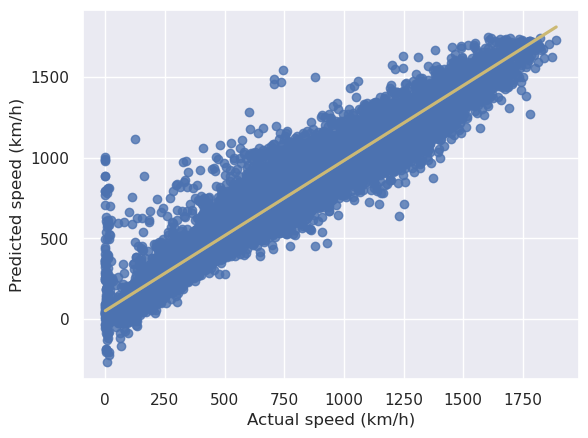

In [17]:
import xgboost as xgb

file_name = "011_xgboost"
model_name = "XGBoost"

xgb_params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**xgb_params), X_train, X_val, y_train, y_val, plot_label)

### Multi-layer Perceptron

Fitting model...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model... OK! Took 71.68044018745422 seconds

model MLP
r2 0.8129342939969338
mae 127.29638
mse 29079.238
rmse 170.52635
mape 4872934000000000.0
time_to_fit 71.68044018745422
time_to_predict 0.04693007469177246

Dumping model...
Dumping model... OK! Took 0.008833169937133789 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


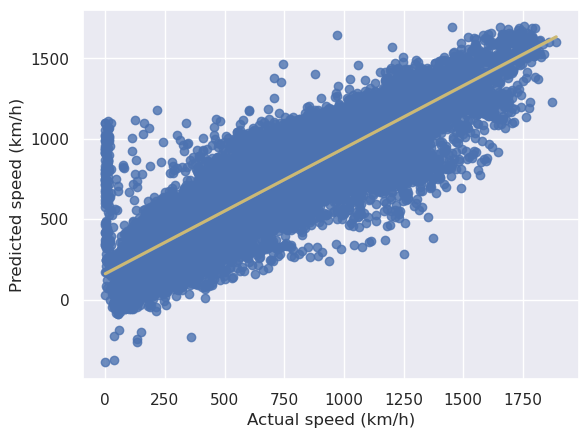

In [18]:
from sklearn.neural_network import MLPRegressor

file_name = "011_mlpr"
model_name = "MLP"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(), X_train, X_val, y_train, y_val, plot_label)